# This code section may take several days to implement 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as ss
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

## set self path
import sys
sys.path.append(r'/Desktop')

import boost
from boost import VCBooster
from loss import LS, LAD

from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.


In [2]:
kfold = 5
def cross_val(X,y,z,kfold):
    kf = KFold(n_splits=kfold, shuffle = True, random_state = 0)
    j = int(0)
    numfeature = X.shape[1]
    numvc = z.shape[1]
    
    for train_index , test_index in kf.split(X): 
        N = len(train_index)
        n = len(test_index)
        X_tr = np.zeros((N,numfeature))
        y_tr = np.zeros(N)
        z_tr = np.zeros((N,numvc))
        X_te = np.zeros((n,numfeature))
        y_te = np.zeros(n)
        z_te = np.zeros((n,numvc))

        for i in range(N):
            X_tr[i] = X[train_index[i]]
            y_tr[i] = y[train_index[i]]
            z_tr[i] = z[train_index[i]]
        for i in range(n):
            X_te[i] = X[test_index[i]]
            y_te[i] = y[test_index[i]]
            z_te[i] = z[test_index[i]]
    return X_tr,y_tr,z_tr,X_te,y_te,z_te

def metrics(Y_pre,Y_te):
    n = len(Y_te)
    MSE = np.sum((Y_te - Y_pre)**2)/n
    MAE = np.sum(np.absolute(Y_te - Y_pre))/n
#     MAPE = np.sum(np.absolute((Y_te - Y_pre)/Y_te))/n
    return MSE,MAE

In [222]:
data = pd.read_csv(r'/Users/danleizhu/Desktop/simulatedcashflows.csv')

data=data[(data['AY']==1994)]
data["sum"]=data[["Pay00","Pay01","Pay02","Pay03","Pay04","Pay05","Pay06","Pay07","Pay08","Pay09","Pay10","Pay11"]].apply(lambda x:x["Pay00"]+x["Pay01"]+x["Pay02"]+x["Pay03"]+x["Pay04"]+x["Pay05"]+x["Pay06"]+x["Pay07"]+x["Pay08"]+x["Pay09"]+x["Pay10"]+x["Pay11"],axis=1)
data["year1"]=data[["Pay01","Pay02","Pay03","Pay04","Pay05","Pay06","Pay07","Pay08","Pay09","Pay10","Pay11"]].apply(lambda x:x["Pay01"]+x["Pay02"]+x["Pay03"]+x["Pay04"]+x["Pay05"]+x["Pay06"]+x["Pay07"]+x["Pay08"]+x["Pay09"]+x["Pay10"]+x["Pay11"],axis=1)
data["year2"]=data[["Pay02","Pay03","Pay04","Pay05","Pay06","Pay07","Pay08","Pay09","Pay10","Pay11"]].apply(lambda x:x["Pay02"]+x["Pay03"]+x["Pay04"]+x["Pay05"]+x["Pay06"]+x["Pay07"]+x["Pay08"]+x["Pay09"]+x["Pay10"]+x["Pay11"],axis=1)
data["year3"]=data[["Pay03","Pay04","Pay05","Pay06","Pay07","Pay08","Pay09","Pay10","Pay11"]].apply(lambda x:x["Pay03"]+x["Pay04"]+x["Pay05"]+x["Pay06"]+x["Pay07"]+x["Pay08"]+x["Pay09"]+x["Pay10"]+x["Pay11"],axis=1)
data["year4"]=data[["Pay04","Pay05","Pay06","Pay07","Pay08","Pay09","Pay10","Pay11"]].apply(lambda x:x["Pay04"]+x["Pay05"]+x["Pay06"]+x["Pay07"]+x["Pay08"]+x["Pay09"]+x["Pay10"]+x["Pay11"],axis=1)
data["year5"]=data[["Pay05","Pay06","Pay07","Pay08","Pay09","Pay10","Pay11"]].apply(lambda x:x["Pay05"]+x["Pay06"]+x["Pay07"]+x["Pay08"]+x["Pay09"]+x["Pay10"]+x["Pay11"],axis=1)
data["year6"]=data[["Pay06","Pay07","Pay08","Pay09","Pay10","Pay11"]].apply(lambda x:x["Pay06"]+x["Pay07"]+x["Pay08"]+x["Pay09"]+x["Pay10"]+x["Pay11"],axis=1)
data["year7"]=data[["Pay07","Pay08","Pay09","Pay10","Pay11"]].apply(lambda x:x["Pay07"]+x["Pay08"]+x["Pay09"]+x["Pay10"]+x["Pay11"],axis=1)
data["year8"]=data[["Pay08","Pay09","Pay10","Pay11"]].apply(lambda x:x["Pay08"]+x["Pay09"]+x["Pay10"]+x["Pay11"],axis=1)
data["year9"]=data[["Pay09","Pay10","Pay11"]].apply(lambda x:x["Pay09"]+x["Pay10"]+x["Pay11"],axis=1)
data["year10"]=data[["Pay10","Pay11"]].apply(lambda x:x["Pay10"]+x["Pay11"],axis=1)
data["year11"]=data[["Pay11"]].apply(lambda x:x["Pay11"],axis=1)

data["year1_before"] = data[["sum","year1"]].apply(lambda x:x["sum"]- x["year1"],axis=1)
data["year2_before"] = data[["sum","year2"]].apply(lambda x:x["sum"]- x["year2"],axis=1)
data["year3_before"] = data[["sum","year3"]].apply(lambda x:x["sum"]- x["year3"],axis=1)
data["year4_before"] = data[["sum","year4"]].apply(lambda x:x["sum"]- x["year4"],axis=1)
data["year5_before"] = data[["sum","year5"]].apply(lambda x:x["sum"]- x["year5"],axis=1)
data["year6_before"] = data[["sum","year6"]].apply(lambda x:x["sum"]- x["year6"],axis=1)
data["year7_before"] = data[["sum","year7"]].apply(lambda x:x["sum"]- x["year7"],axis=1)
data["year8_before"] = data[["sum","year8"]].apply(lambda x:x["sum"]- x["year8"],axis=1)
data["year9_before"] = data[["sum","year9"]].apply(lambda x:x["sum"]- x["year9"],axis=1)
data["year10_before"] = data[["sum","year10"]].apply(lambda x:x["sum"]- x["year10"],axis=1)
data["year11_before"] = data[["sum","year11"]].apply(lambda x:x["sum"]- x["year11"],axis=1)

pay_year = np.array(data[["Pay00","Pay01","Pay02","Pay03","Pay04","Pay05","Pay06",
                          "Pay07","Pay08","Pay09","Pay10","Pay11"]])

data_year = np.array(data[["sum","year1","year2","year3","year4","year5","year6"
                           ,"year7","year8","year9","year10","year11"]])
data_before_year = np.array(data[["year1_before","year2_before","year3_before",
                                  "year4_before","year5_before","year6_before"
                           ,"year7_before","year8_before","year9_before","year10_before","year11_before"]])

data_before_year = np.column_stack(((np.zeros(data_before_year.shape[0]),data_before_year)))

## Transformation
data[['age']] = np.log(data[['age']])
data[['inj_part']] = np.sqrt(data[['inj_part']])

pay_year = preprocessing.normalize(pay_year)


## VC Decision tree

In [71]:
z = np.array(data[['cc']])

metrics_grid = np.zeros((12,2))
numvc = z.shape[1]
for i in range(12):
    X =  np.array(data[['LoB','age','inj_part','cc','RepDel','AQ']])
#     X =  np.array(data[['LoB','age','inj_part','cc','AQ']])

    X = np.column_stack(((pay_year[:,0:i+1]), X))
    y = data_year[:,i]
    vcb = VCBooster(learning_rate=0.01, min_samples_leaf=0.05, n_stages=300)
    X_tr,y_tr,z_tr,X_te,y_te,z_te = cross_val(X,y,z,kfold)
    
    vcb.fit(X = X_tr, Z = z_tr.reshape(-1,numvc), y = y_tr)
    vcb_pred = vcb.predict(X=X_te, Z=z_te.reshape(-1, numvc))
    vcb_grid.append(vcb_pred)
    metrics_grid[i,:] = metrics(vcb_pred,y_te)

<class 'numpy.ndarray'>
(40023, 1)
[[1.82666876e+08 2.43499464e+03]
 [1.15010236e+08 1.49719004e+03]
 [4.48941626e+07 7.80297348e+02]
 [2.20014936e+07 4.80734906e+02]
 [1.20977827e+07 3.43957600e+02]
 [7.09002470e+06 2.55104306e+02]
 [3.90052415e+06 1.89232018e+02]
 [2.27059875e+06 1.39119490e+02]
 [1.21498506e+06 9.67995863e+01]
 [5.50556484e+05 6.81946448e+01]
 [2.00783213e+05 4.17957640e+01]
 [3.44361586e+04 1.87915858e+01]]


# VCM feature selection: 
# find the optimal number of predictors in coefficient model. On 12 evaluation dates, try and test all combinations of 6 factors, the feature amount can be: 1, 2, 3, 4, 5, 6. 
# Calculate mean MSE, MAE, Running time to do comparison.

In [101]:
import time
kfold = 5
vcb_grid = list()
metrics_grid1 = np.zeros((12,3))
metrics_grid2 = np.zeros((12,3))
metrics_grid3 = np.zeros((12,3))
metrics_grid4 = np.zeros((12,3))
metrics_grid5 = np.zeros((12,3))
metrics_grid6 = np.zeros((12,3))


for i in range(12):
    X =  np.array(data[['LoB','age','inj_part','cc','RepDel','AQ']])
    factors = np.array(data[['LoB','age','inj_part','cc','RepDel','AQ']])
    num_fac = factors.shape[1]
    X = np.column_stack(((pay_year[:,0:i+1]), X))
    y = data_year[:,i]
    vcb = VCBooster(learning_rate=0.01, min_samples_leaf=0.05,max_depth = 5, n_stages=800)

    for j in range(1,num_fac+1):
        if j==1:
            
            mse1,mae1,runtime1 = 0,0,0
            count1 = 0
            for a in range(num_fac):
                z = np.array(factors[:,a])
                numvc = j
                z = z.reshape(-1,j)
                X_tr,y_tr,z_tr,X_te,y_te,z_te = cross_val(X,y,z,kfold)
                start = time.time()
                vcb.fit(X = X_tr, Z = z_tr.reshape(-1,numvc), y = y_tr)
                end = time.time()
                runtime1_ = end - start
                vcb_pred = vcb.predict(X=X_te, Z=z_te.reshape(-1, numvc))
#                 vcb_grid.append(vcb_pred)
                mse1_,mae1_ = metrics(vcb_pred,y_te)
                mse1 += mse1_
                mae1 += mae1_
                runtime1 += runtime1_
                count1 = count1 + 1
            metrics_grid1[i,0] = mse1/count1
            metrics_grid1[i,1] = mae1/count1
            metrics_grid1[i,2] = runtime1/count1
            
            
        if j==2:
            mse2,mae2,runtime2 = 0,0,0
            count2 = 0
            for a in range(num_fac):
                for b in range(a+1,num_fac):
                    z = factors[:,(a,b)]
                    numvc = j
                    X_tr,y_tr,z_tr,X_te,y_te,z_te = cross_val(X,y,z,kfold)
                    start = time.time()
                    vcb.fit(X = X_tr, Z = z_tr.reshape(-1,numvc), y = y_tr)
                    end = time.time()
                    runtime2_ = end - start
                    vcb_pred = vcb.predict(X=X_te, Z=z_te.reshape(-1, numvc))
#                     vcb_grid.append(vcb_pred)
                    mse2_,mae2_ = metrics(vcb_pred,y_te)
                    mse2 += mse2_
                    mae2 += mae2_
                    runtime2 += runtime2_
                    count2 = count2 + 1
            metrics_grid2[i,0] = mse2/count2
            metrics_grid2[i,1] = mae2/count2
            metrics_grid2[i,2] = runtime2/count2
            
            
        if j==3:
            mse3,mae3,runtime3 = 0,0,0
            count3 = 0
            for a in range(num_fac):
                for b in range(a+1,num_fac):
                    for c in range(b+1,num_fac):
                        z = factors[:,(a,b,c)]
                        numvc = j
                        X_tr,y_tr,z_tr,X_te,y_te,z_te = cross_val(X,y,z,kfold)
                        start = time.time()

                        vcb.fit(X = X_tr, Z = z_tr.reshape(-1,numvc), y = y_tr)
                        end = time.time()
                        runtime3_ = end - start
                        vcb_pred = vcb.predict(X=X_te, Z=z_te.reshape(-1, numvc))
#                         vcb_grid.append(vcb_pred)
                        mse3_,mae3_ = metrics(vcb_pred,y_te)
                        mse3 += mse3_
                        mae3 += mae3_
                        runtime3 += runtime3_
                        count3 = count3 + 1
            metrics_grid3[i,0] = mse3/count3
            metrics_grid3[i,1] = mae3/count3
            metrics_grid3[i,2] = runtime3/count3
            
        if j==4:
            mse4,mae4,runtime4 = 0,0,0
            count4 = 0
            for a in range(num_fac):
                for b in range(a+1,num_fac):
                    for c in range(b+1,num_fac):
                        for d in range(c+1,num_fac):
                            z = factors[:,(a,b,c,d)]
                            numvc = j
                            X_tr,y_tr,z_tr,X_te,y_te,z_te = cross_val(X,y,z,kfold)
                            start = time.time()

                            vcb.fit(X = X_tr, Z = z_tr.reshape(-1,numvc), y = y_tr)
                            end = time.time()
                            runtime4_ = end - start
                            vcb_pred = vcb.predict(X=X_te, Z=z_te.reshape(-1, numvc))
#                             vcb_grid.append(vcb_pred)
                            mse4_,mae4_ = metrics(vcb_pred,y_te)
                            mse4 += mse4_
                            mae4 += mae4_
                            runtime4 += runtime4_
                            count4 = count4 + 1
            metrics_grid4[i,0] = mse4/count4
            metrics_grid4[i,1] = mae4/count4
            metrics_grid4[i,2] = runtime4/count4
            
        if j==5:
            mse5,mae5,runtime5 = 0,0,0
            count5 = 0
            for a in range(num_fac):
                for b in range(a+1,num_fac):
                    for c in range(b+1,num_fac):
                        for d in range(c+1,num_fac):
                            for e in range(d+1,num_fac):
                                z = factors[:,(a,b,c,d,e)]
                                numvc = j
                                X_tr,y_tr,z_tr,X_te,y_te,z_te = cross_val(X,y,z,kfold)
                                start = time.time()

                                vcb.fit(X = X_tr, Z = z_tr.reshape(-1,numvc), y = y_tr)
                                end = time.time()
                                runtime5_ = end - start
                                vcb_pred = vcb.predict(X=X_te, Z=z_te.reshape(-1, numvc))
#                                 vcb_grid.append(vcb_pred)
                                mse5_,mae5_ = metrics(vcb_pred,y_te)
                                mse5 += mse5_
                                mae5 += mae5_
                                runtime5 += runtime5_
                                count5 = count5 + 1
            metrics_grid5[i,0] = mse5/count5
            metrics_grid5[i,1] = mae5/count5
            metrics_grid5[i,2] = runtime5/count5
            
        else:
            z = factors
            numvc = 6
            
            X_tr,y_tr,z_tr,X_te,y_te,z_te = cross_val(X,y,z,kfold)
            start = time.time()
            vcb.fit(X = X_tr, Z = z_tr.reshape(-1,numvc), y = y_tr)
            end = time.time()
            runtime6 = end - start
            vcb_pred = vcb.predict(X=X_te, Z=z_te.reshape(-1, numvc))
            metrics_grid6[i,(0,1)] = metrics(vcb_pred,y_te)
            metrics_grid6[i,2] = runtime6
            
                            

# Plots for comparison 

_________________________________MSE________________________________



<Figure size 1440x1440 with 0 Axes>

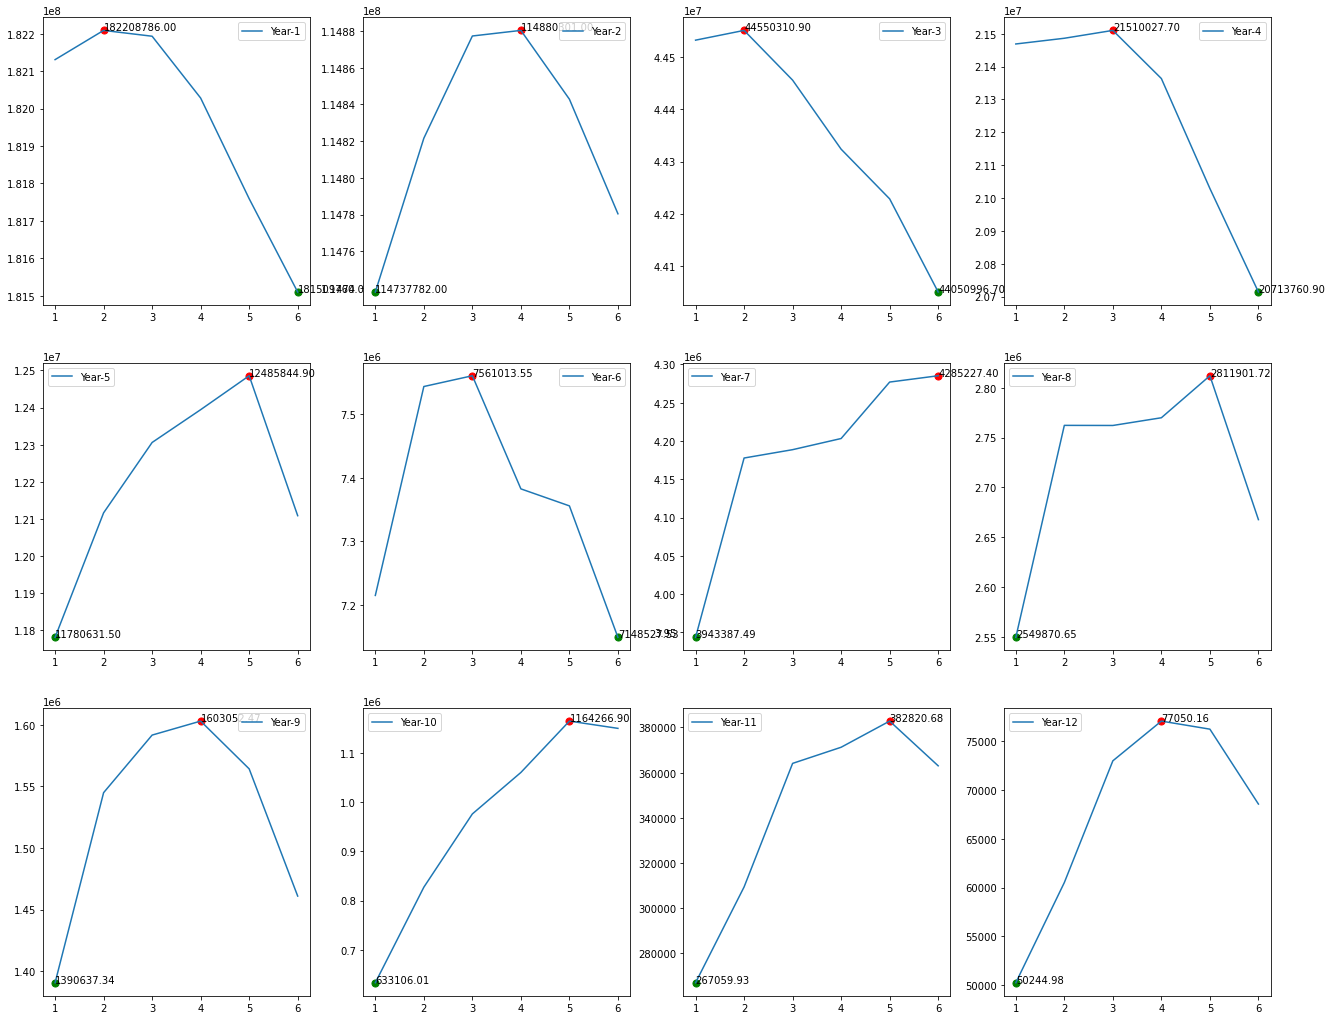

_________________________________MAE________________________________



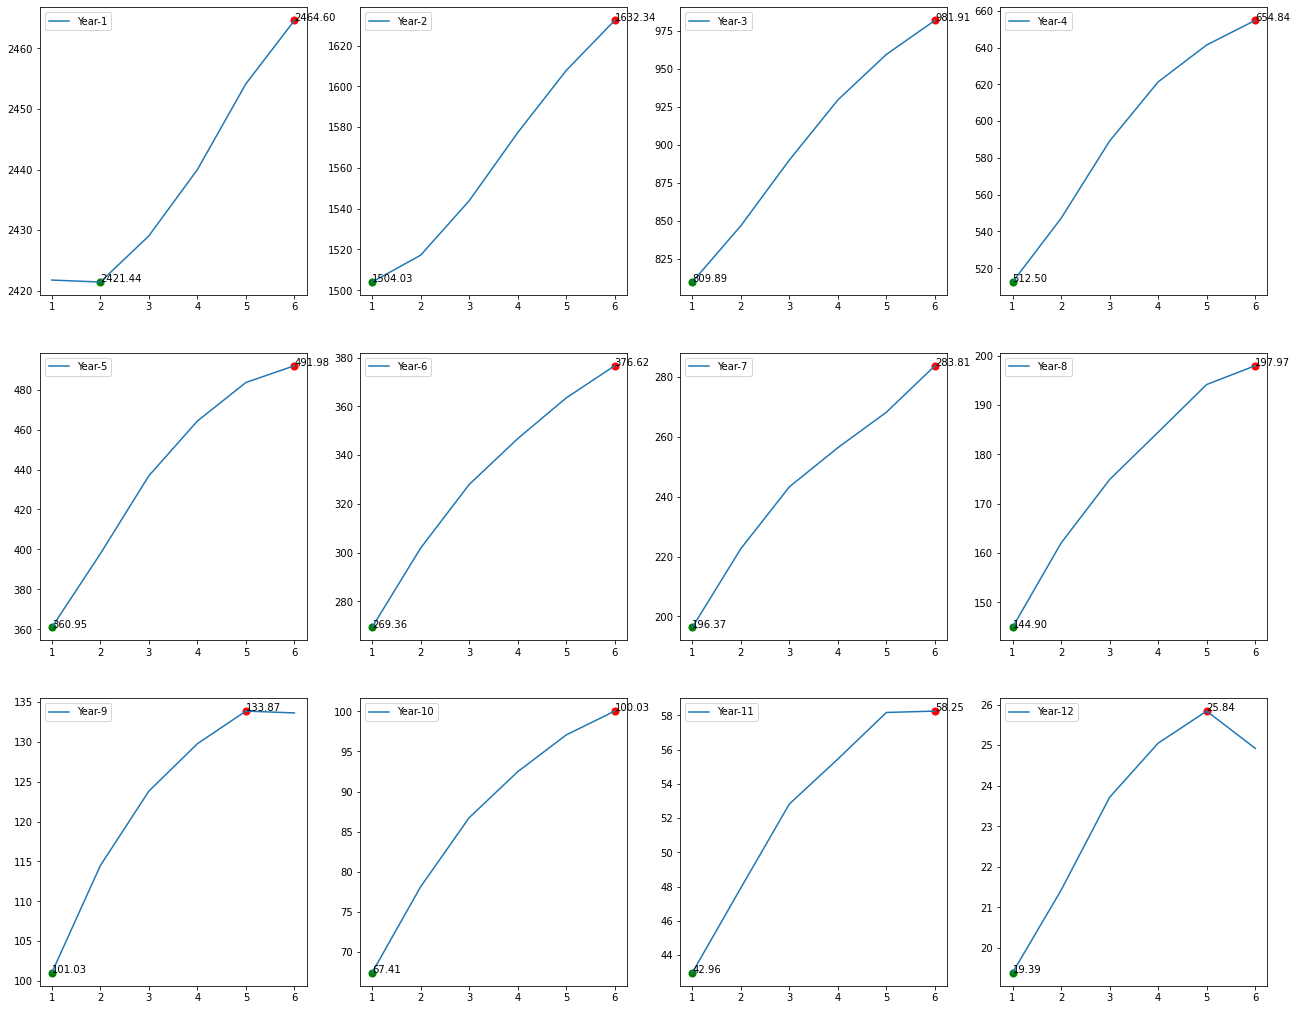

_________________________________Running time________________________________



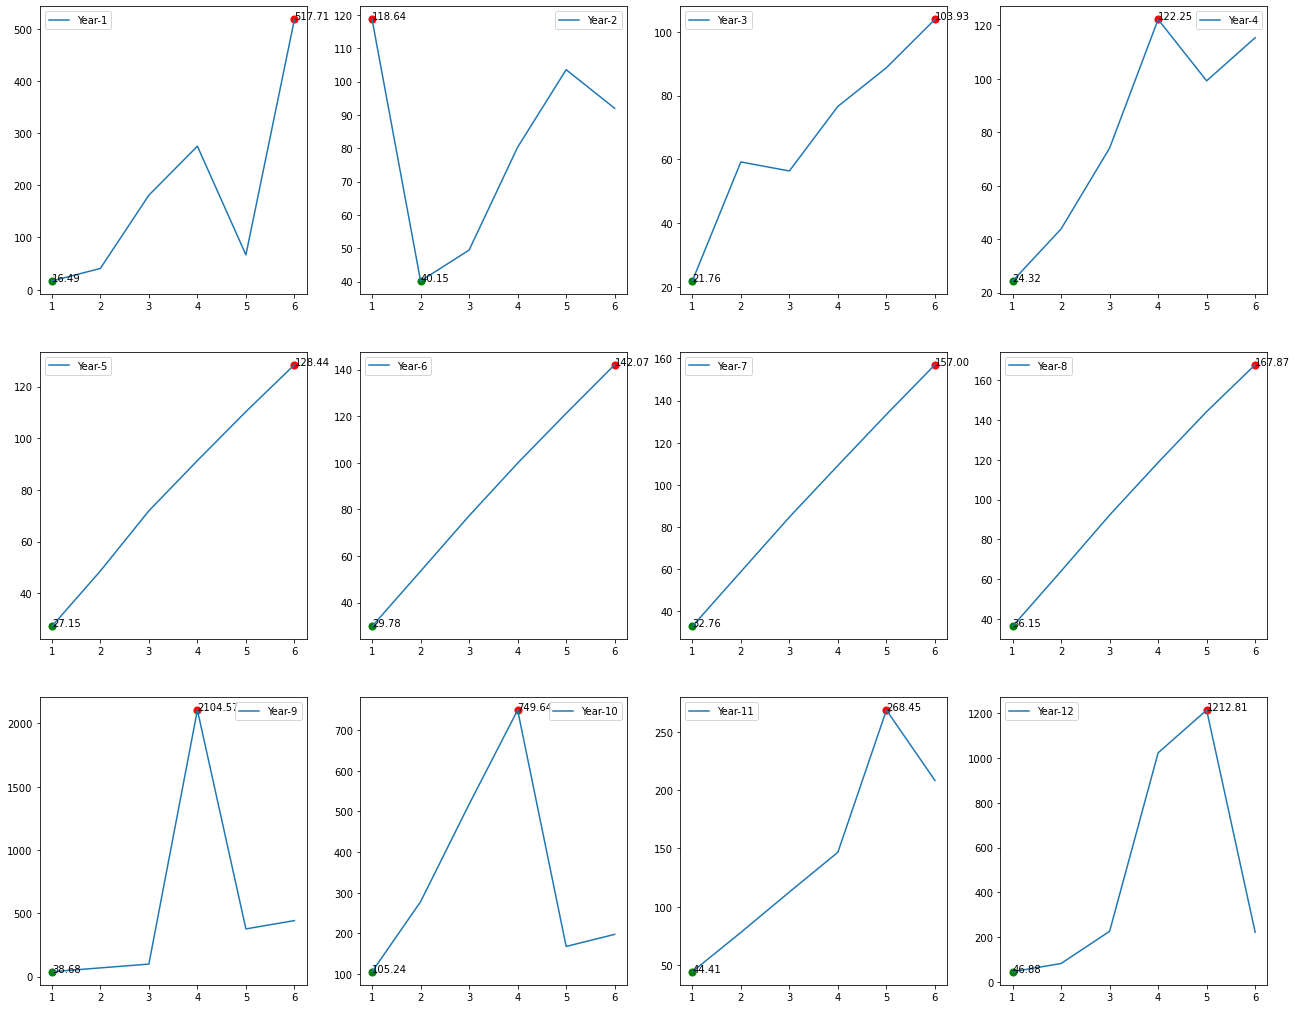

In [106]:
name_year = ['1','2','3','4','5','6','7','8','9','10','11','12']
num_vcfac = np.array(([1, 2, 3, 4, 5, 6]))

num_perf1 = np.zeros((12,6))
num_perf2 = np.zeros((12,6))
num_runtime = np.zeros((12,6))
plt.figure(figsize = (20,20))

for i in range(12):
    num_perf1[i,0] = metrics_grid1[i,0]
    num_perf1[i,1] = metrics_grid2[i,0]
    num_perf1[i,2] = metrics_grid3[i,0]
    num_perf1[i,3] = metrics_grid4[i,0]
    num_perf1[i,4] = metrics_grid5[i,0]
    num_perf1[i,5] = metrics_grid6[i,0]
    num_perf2[i,0] = metrics_grid1[i,1]
    num_perf2[i,1] = metrics_grid2[i,1]
    num_perf2[i,2] = metrics_grid3[i,1]
    num_perf2[i,3] = metrics_grid4[i,1]
    num_perf2[i,4] = metrics_grid5[i,1]
    num_perf2[i,5] = metrics_grid6[i,1]
    num_runtime[i,0] = metrics_grid1[i,2]
    num_runtime[i,1] = metrics_grid2[i,2]
    num_runtime[i,2] = metrics_grid3[i,2]
    num_runtime[i,3] = metrics_grid4[i,2]
    num_runtime[i,4] = metrics_grid5[i,2]
    num_runtime[i,5] = metrics_grid6[i,2]
    
plt.figure(figsize = (22,18))
print("_________________________________MSE________________________________\n")
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.plot(num_vcfac, num_perf1[i,:], label = f"Year-{name_year[i]}")
#     plt.xlabel = "Number of VC factors"
    max_idx=np.argmax(num_perf1[i,:])#max value index
    min_idx=np.argmin(num_perf1[i,:])#min value index
    
    max_x, max_y = num_vcfac[max_idx],num_perf1[i,max_idx]
    min_x, min_y = num_vcfac[min_idx],num_perf1[i,min_idx]
    
    plt.scatter(max_x, max_y, color='red', s=50)
    plt.scatter(min_x, min_y, color='green', s=50)
    plt.annotate(f'{max_y:.2f}', xy=(max_x, max_y),
                 xytext=(max_x, max_y))
    plt.annotate(f'{min_y:.2f}', xy=(min_x, min_y+2),
                 xytext=(min_x, min_y))
    plt.legend()
plt.show()

print("_________________________________MAE________________________________\n")

plt.figure(figsize = (22,18))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.plot(num_vcfac, num_perf2[i,:], label = f"Year-{name_year[i]}")
#     plt.xlabel = "Number of VC factors"
    max_idx=np.argmax(num_perf2[i,:])#max value index
    min_idx=np.argmin(num_perf2[i,:])#min value index
    
    max_x, max_y = num_vcfac[max_idx],num_perf2[i,max_idx]
    min_x, min_y = num_vcfac[min_idx],num_perf2[i,min_idx]
    
    plt.scatter(max_x, max_y, color='red', s=50)
    plt.scatter(min_x, min_y, color='green', s=50)
    plt.annotate(f'{max_y:.2f}', xy=(max_x, max_y),
                 xytext=(max_x, max_y))
    plt.annotate(f'{min_y:.2f}', xy=(min_x, min_y+2),
                 xytext=(min_x, min_y))
    plt.legend(loc = "best")
plt.show()

print("_________________________________Running time________________________________\n")

plt.figure(figsize = (22,18))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.plot(num_vcfac, num_runtime[i,:], label = f"Year-{name_year[i]}")
    plt.xlabel = "Number of VC factors"
    max_idx=np.argmax(num_runtime[i,:])#max value index
    min_idx=np.argmin(num_runtime[i,:])#min value index
    
    max_x, max_y = num_vcfac[max_idx],num_runtime[i,max_idx]
    min_x, min_y = num_vcfac[min_idx],num_runtime[i,min_idx]
    
    plt.scatter(max_x, max_y, color='red', s=50)
    plt.scatter(min_x, min_y, color='green', s=50)
    plt.annotate(f'{max_y:.2f}', xy=(max_x, max_y+2),
                 xytext=(max_x, max_y))
    plt.annotate(f'{min_y:.2f}', xy=(min_x, min_y+15),
                 xytext=(min_x, min_y))
    plt.legend()
plt.show()